In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Load train data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Load test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Group by porcentage survival rate by gender
survival_rate_by_gender = train_data.groupby('Sex')['Survived'].mean() * 100

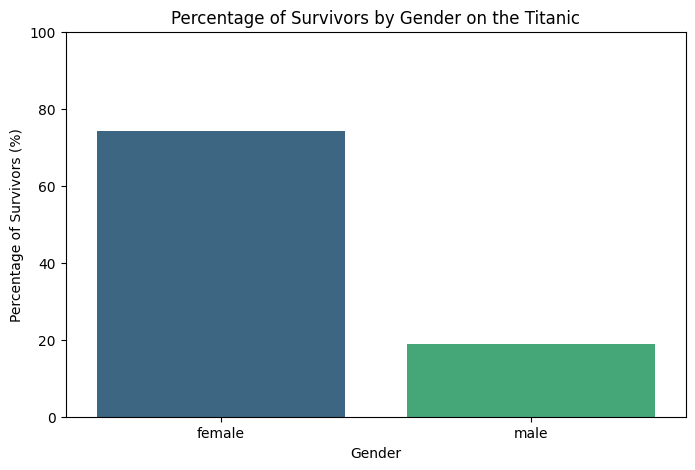

In [5]:
# Import sns and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Create a graph showing the odds
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values, palette="viridis")
plt.title('Percentage of Survivors by Gender on the Titanic')
plt.ylabel('Percentage of Survivors (%)')
plt.xlabel('Gender')
plt.ylim(0, 100)
plt.show()

In [6]:
# Looking for correlation between survival rate and ticket class
survival_rate_by_class = train_data.groupby('Pclass')['Survived'].mean() * 100

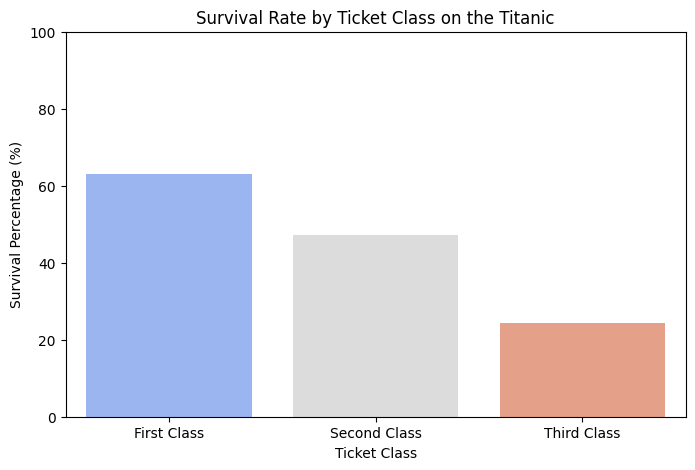

In [7]:
# Import sns and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart to visualize the percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values, palette="coolwarm")
plt.title('Survival Rate by Ticket Class on the Titanic')
plt.ylabel('Survival Percentage (%)')
plt.xlabel('Ticket Class')
plt.xticks(ticks=[0, 1, 2], labels=['First Class', 'Second Class', 'Third Class'])  # Renaming the ticks to be more descriptive
plt.ylim(0, 100)
plt.show()


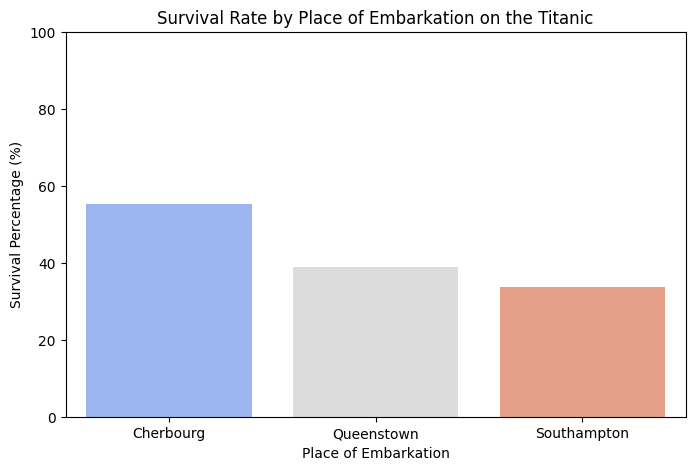

In [8]:
# Import sns and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the survival percentage by place of embarkation
survival_rate_by_embarkation = train_data.groupby('Embarked')['Survived'].mean() * 100

# Create a bar chart to visualize the percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate_by_embarkation.index, y=survival_rate_by_embarkation.values, palette="coolwarm")
plt.title('Survival Rate by Place of Embarkation on the Titanic')
plt.ylabel('Survival Percentage (%)')
plt.xlabel('Place of Embarkation')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])  # Renaming the ticks to be more descriptive
plt.ylim(0, 100)
plt.show()


In [9]:
# Apply RandomForestTree for 3 variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Handle missing values
train_data['Embarked'].fillna('S')
test_data['Embarked'].fillna('S')

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
all_sex_data = pd.concat([train_data['Sex'], test_data['Sex']])
all_embarked_data = pd.concat([train_data['Embarked'], test_data['Embarked']])
le_sex.fit(all_sex_data)
le_embarked.fit(all_embarked_data)

# Transform Data
train_data['Sex'] = le_sex.transform(train_data['Sex'])
train_data['Embarked'] = le_embarked.transform(train_data['Embarked'])

# Columns for the model
features = train_data[['Pclass', 'Sex', 'Embarked']]
target = train_data['Survived']

In [10]:
# Visualize Train Data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [11]:
# Visualize Test Data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
# Split the training data into train and test sets for internal validation
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the internal test set and calculate accuracy
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'The internal validation accuracy of the model is: {accuracy * 100:.2f}%')

# Encode the test data using the same encoders
test_data['Sex'] = le_sex.transform(test_data['Sex'])
test_data['Embarked'] = le_embarked.transform(test_data['Embarked'].fillna('S'))

# Prepare features from the actual test data
test_features = test_data[['Pclass', 'Sex', 'Embarked']]

# Make predictions with the trained model for submission
final_predictions = model.predict(test_features)

# Create a DataFrame with the Passenger IDs and the predictions for submission
output = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': final_predictions
})

# Save the DataFrame to a CSV file for submission
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

The internal validation accuracy of the model is: 79.33%
Your submission was successfully saved!
